<a href="https://colab.research.google.com/github/tskmr/BS/blob/main/ex0620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note: There are often multiple ways to answer each question.**

1. Download `nba_free_throws.csv` from https://github.com/kjytay/misc/tree/master/data. (Right click on `nba_free_throws.csv` and select "Save Link As..."). Import this dataset into R as the variable `df`. Are there columns which need their format changed?
 https://github.com/kjytay/misc/tree/master/data から `nba_free_throws.csv` をダウンロードせよ(`nba_free_throws.csv`を右クリックし、"Save Link As... "を選択). このデータセットを変数 `df`としてRにインポートせよ．フォーマットを変更する必要があるカラムはあるか？



In [6]:
library(tidyverse)
df <- read_csv("https://raw.githubusercontent.com/kjytay/misc/master/data/nba_free_throws.csv")
# df
str(df)

Rows: 618019 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): end_result, game, play, player, playoffs, score, season
dbl  (3): game_id, period, shot_made
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [618,019 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ end_result: chr [1:618019] "106 - 114" "106 - 114" "106 - 114" "106 - 114" ...
 $ game      : chr [1:618019] "PHX - LAL" "PHX - LAL" "PHX - LAL" "PHX - LAL" ...
 $ game_id   : num [1:618019] 2.61e+08 2.61e+08 2.61e+08 2.61e+08 2.61e+08 ...
 $ period    : num [1:618019] 1 1 1 1 1 1 1 2 2 2 ...
 $ play      : chr [1:618019] "Andrew Bynum makes free throw 1 of 2" "Andrew Bynum makes free throw 2 of 2" "Andrew Bynum makes free throw 1 of 2" "Andrew Bynum misses free throw 2 of 2" ...
 $ player    : chr [1:618019] "Andrew Bynum" "Andrew Bynum" "Andrew Bynum" "Andrew Bynum" ...
 $ playoffs  : chr [1:618019] "regular" "regular" "regular" "regular" ...
 $ score     : chr [1:618019] "0 - 1" "0 - 2" "18 - 12" "18 - 12" ...
 $ season    : chr [1:618019] "2006 - 2007" "2006 - 2007" "2006 - 2007" "2006 - 2007" ...
 $ shot_made : num [1:618019] 1 1 1 0 1 1 1 0 1 1 ...
 $ time      : 'hms' num [1:618019] 11:45:00 11:45:00 07:26:00 07:

`game_id`は`col_double()`になっているが，`col_character()`のほうが適切かもしれない．
`time`は時間として変更すべき．
ここでは，`game_id`と`time`を変更してみる．


In [8]:
df <- read_csv("https://raw.githubusercontent.com/kjytay/misc/master/data/nba_free_throws.csv",
               col_types = cols(game_id = col_character()))
str(df)


spc_tbl_ [618,019 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ end_result: chr [1:618019] "106 - 114" "106 - 114" "106 - 114" "106 - 114" ...
 $ game      : chr [1:618019] "PHX - LAL" "PHX - LAL" "PHX - LAL" "PHX - LAL" ...
 $ game_id   : chr [1:618019] "261031013.0" "261031013.0" "261031013.0" "261031013.0" ...
 $ period    : num [1:618019] 1 1 1 1 1 1 1 2 2 2 ...
 $ play      : chr [1:618019] "Andrew Bynum makes free throw 1 of 2" "Andrew Bynum makes free throw 2 of 2" "Andrew Bynum makes free throw 1 of 2" "Andrew Bynum misses free throw 2 of 2" ...
 $ player    : chr [1:618019] "Andrew Bynum" "Andrew Bynum" "Andrew Bynum" "Andrew Bynum" ...
 $ playoffs  : chr [1:618019] "regular" "regular" "regular" "regular" ...
 $ score     : chr [1:618019] "0 - 1" "0 - 2" "18 - 12" "18 - 12" ...
 $ season    : chr [1:618019] "2006 - 2007" "2006 - 2007" "2006 - 2007" "2006 - 2007" ...
 $ shot_made : num [1:618019] 1 1 1 0 1 1 1 0 1 1 ...
 $ time      : 'hms' num [1:618019] 11:45:00 11:45:00 0

2. Select just the rows from the 2015-2016 regular season, remove the column `play` and save the result in `df2`.
2015-2016年のレギュラーシーズンの行だけを選択し、列 `play` を削除して、結果を `df2` に保存せよ．


In [ ]:
df %>% filter(season == "2015 - 2016" & playoffs == "regular") %>% select(-play) -> df2
df2

All questions from here are about `df2`.  ここからの質問はすべて`df2`に関するものとする．

3. Display the top 10 players who took the most free throws.
最も多くフリースローを取った選手上位10名を表示せよ．


In [ ]:
df2 %>% group_by(player) %>% summarise(count = n()) %>%
  arrange(desc(count)) %>% head(10)

4. Free throw percentage is defined as the percentage of shots taken which were made. Display the top 10 players with the highest free throw percentages. (Hint: modify Qn 3 code to take two summaries.)
フリースロー率とは、打たれたシュートのうち、決められたシュートの割合のことである．フリースロー率の高い選手上位10名を表示せよ(ヒント：Qn 3のコードを修正して、2つのサマリーを取る)．


In [ ]:
df2 %>% group_by(player) %>% summarise(count = n(), success = sum(shot_made)) %>%
  mutate(rate = success/count) %>%
  arrange(desc(rate)) %>%
  head(10)


5. The highest free throw percentages are so high because these players didn't take many shots. Display the top 10 players with the highest free throw percentages **among only the players who took at least 100 free throws**. (Hint: Filter Qn 4 code at an appropriate step.) 最も高いフリースロー率は、これらの選手があまりシュートを打たなかったから高い．**少なくとも100本のフリースローを行った選手の中で**、フリースロー率が最も高い選手上位10人を表示せよ(ヒント：Qn 4のコードを適切なステップでフィルタリングする。)

In [ ]:
df2 %>% group_by(player) %>%
  summarise(count = n(), success = sum(shot_made)) %>%
  filter(count>=100) %>%
  mutate(rate = success/count) %>%
  arrange(desc(rate)) %>%
  head(10)


6. Save the summary table of shots taken, shots made and free throw percentage by player in `summary_df` (only players who took at least 100 free throws). Using `summary_df`, make a scatterplot of free throw percentage vs. free throws taken. Set the `alpha` value of the points to `0.5`, and draw a blue dashed horizontal line to show the mean free throw percentage across these players. (Hint: For the horizontal line, use `geom_abline`.)
選手ごとの打ったシュート数、決めたシュート数、フリースロー率のサマリー表を `summary_df` に保存せよ（少なくとも100本のフリースローを行った選手のみ）．`summary_df`を使用して、フリースロー率対フリースロー回数の散布図を作成せよ．散布点の `alpha` 値を `0.5`に設定し、さらに，これらの選手におけるフリースロー率の平均を示す青い破線の水平線を引け(ヒント: 水平線には `geom_abline` を使用する)．


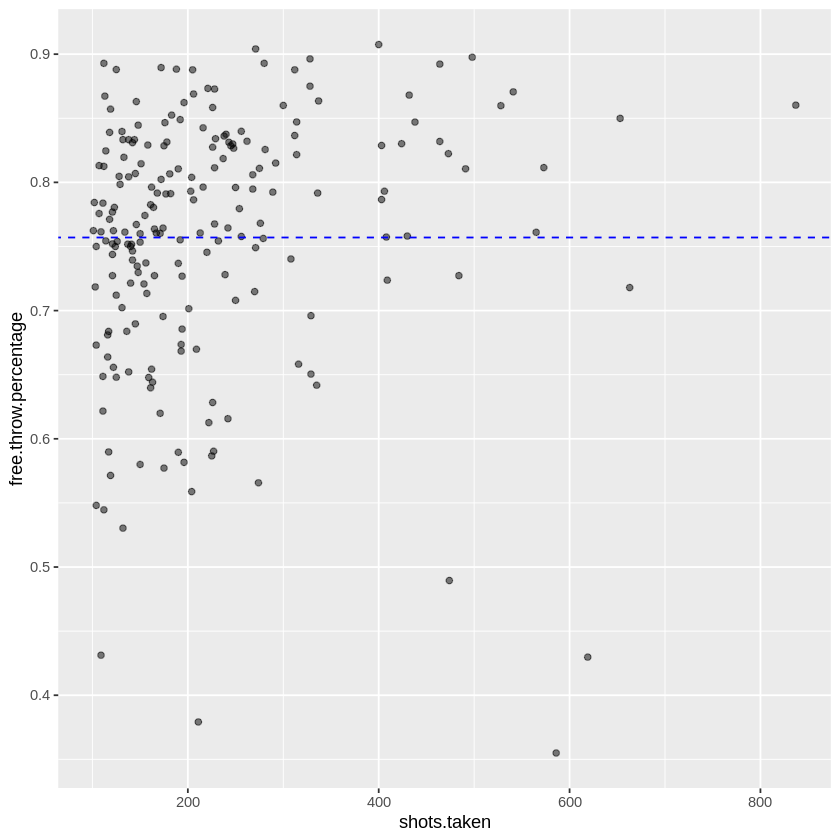

In [13]:
df2 %>% group_by(player) %>%
  summarise(shots.taken = n(), shots.made = sum(shot_made)) %>%
    mutate(free.throw.percentage = shots.made/shots.taken) %>%
  filter(shots.taken>=100) -> summary_df
summary_df %>%
  ggplot(aes(shots.taken, free.throw.percentage)) +
  geom_point(alpha=0.5) +
  geom_abline(slope=0, intercept = mean(summary_df$free.throw.percentage), col="blue", linetype="dashed")


7. Which game (in `df2`) had the most number of free throws? Save the rows in `df2` from that game in `df3`.
(`df2`において)どの試合が一番フリースローの数が多かったか？その試合の `df2` の行を `df3` に保存せよ．


In [19]:
df2 %>% group_by(game_id) %>% summarise(shots.taken = n()) %>%
  arrange(desc(shots.taken)) %>% head(1) %>% pull(game_id) -> max.id
df2 %>% filter(game_id == max.id) -> df3
df3

end_result,game,game_id,period,player,playoffs,score,season,shot_made,time
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<time>
116 - 100,HOU - PHX,400828701.0,1,Dwight Howard,regular,3 - 4,2015 - 2016,1,10:08:00
116 - 100,HOU - PHX,400828701.0,1,Dwight Howard,regular,4 - 4,2015 - 2016,1,10:08:00
116 - 100,HOU - PHX,400828701.0,1,James Harden,regular,9 - 7,2015 - 2016,1,08:29:00
116 - 100,HOU - PHX,400828701.0,1,James Harden,regular,10 - 7,2015 - 2016,1,08:29:00
116 - 100,HOU - PHX,400828701.0,1,James Harden,regular,14 - 10,2015 - 2016,0,06:22:00
116 - 100,HOU - PHX,400828701.0,1,James Harden,regular,15 - 10,2015 - 2016,1,06:22:00
116 - 100,HOU - PHX,400828701.0,1,P.J. Tucker,regular,19 - 17,2015 - 2016,0,02:56:00
116 - 100,HOU - PHX,400828701.0,1,P.J. Tucker,regular,19 - 17,2015 - 2016,0,02:56:00
116 - 100,HOU - PHX,400828701.0,1,Corey Brewer,regular,20 - 19,2015 - 2016,1,01:34:00


In [4]:




```{r}
```

8. Make a bar plot showing the number of free throws each player took in this game. Add `coord_flip()` as a layer to the plot so that the bars are horizontal. (Bonus: Can you sort the bars such that the longest ones go on top? The `forcats` package will be helpful, as will the last example of Section 15.4 of R4DS.)
このゲームで各プレイヤーが行ったフリースローの数を示す棒グラフを作成せよ．棒グラフが水平になるように、プロットにレイヤーとして `coord_flip()` を追加せよ(ボーナス: 最も長い棒が上に来るように棒を並べ替えることができるか? `forcats` パッケージが役に立つだろうし、R4DSのセクション15.4の最後の例も同じく役に立つ)．

```{r}
df3 %>% ggplot(aes(x=player)) + geom_bar() +coord_flip()
```

```{r}
df3 %>% group_by(player) %>% summarise(shots.taken = n()) %>% arrange(shots.taken) %>% pull(player) -> p1
df3 %>% mutate(player = factor(player, levels=p1)) %>%
  ggplot(aes(x=player)) + geom_bar() +coord_flip()
```

The following code joins data from `summary_df` to `df3` and saves it as df4:
次のコードは、`summary_df`から`df3`までのデータを結合して、`df4`として保存する：
```{r eval=FALSE}
df4 <- df3 %>% left_join(summary_df, by = "player")
```


9. Modify your bar plot in Qn 8 so that the fill of the bars is equal to the player's free throw percentage. Add the layer `scale_fill_distiller(palette = "RdYlGn", direction = 1)` to give your bars some appropriate colors. Why are some bars grey?
棒グラフの fill が選手のフリースロー率と同じになるように、Qn 8 の棒グラフを修正せよ．レイヤー `scale_fill_distiller(palette = "RdYlGn", direction = 1)`を追加して、棒に適切な色をつけよ．なぜいくつかの灰色のバーがあるのだろうか？



10. Using `tidyr`'s `separate` function, separate the `game` column in `df2` to a `home` column which has the name of the home team, and an `away` column which has the name of the away team. (See Section 12.4 of R4DS for details on the `separate` function.)
`tidyr`の `separate` 関数を使用して、`df2` の `game` 列をホームチームの名前を持つ `home` 列とアウェイチームの名前を持つ `away` 列に分離せよ (`separate`関数の詳細については、R4DSのセクション12.4を参照せよ)．



ERROR: ignored